<a href="https://colab.research.google.com/github/patison5/FAIntelligence/blob/main/Pygmo_%D0%BE%D0%BF%D1%82%D0%B8%D0%BC%D0%B8%D0%B7%D0%B0%D1%86%D0%B8%D1%8F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Инициализация

In [2]:
!pip install PyGMO

     |████████████████████████████████| 11.5 MB 5.3 MB/s 


In [3]:
import numpy as np
import pygmo as pg
import sympy as sy

In [73]:
def P4MultiSym():
    xs = [sy.Symbol('x'+str(i)) for i in range(2)]
    PI = sy.pi
    f = xs[0] * sy.sin(4 * PI * xs[0]) + xs[1] * sy.sin(4 * PI * xs[1])
    return f, xs

def P4Multi(x, y):
    ''' 
        Мультифункция (рис П.3)
        Глобальный экстремум Z = 837,9657 
    '''
    return x * np.sin(4 * np.pi * x) + y * np.sin(4 * np.pi * y)

def RosenSym():
  xs = [sy.Symbol('x'+str(i)) for i in range(2)]
  f = 100*(xs[1] - xs[0]**2)**2 + (1 - xs[0])**2
  return f, xs

def RosenAlg(x, y):
    return 100*(y - x**2)**2 + (1 - x)**2

def get_fn_resultSingle(df, x0, xs):
    ''' 
        Вернуть числовой результат частных производных символьно заданной функции для одного параметра x, y
        df - массив частных производных функции
        x0 - массив входных данных [x, y]
    '''
    variables = [(xs[i], x0[i]) for i in range(len(xs))] # -> [(x0, 1.0), (x1, 2.0)]
    return np.double(df.subs(variables))

In [15]:
f_multi, xs_multi = P4MultiSym()
f_rosen, xs_rosen = RosenSym()
# f, xs
print(f_multi, xs_multi)
print()
print(f_rosen, f_rosen)

x0*sin(4*pi*x0) + x1*sin(4*pi*x1) [x0, x1]

(1 - x0)**2 + 100*(-x0**2 + x1)**2 (1 - x0)**2 + 100*(-x0**2 + x1)**2


In [16]:
class My_MultiFunction:
    def __init__(self, dim):
        self.dim = dim

    def fitness(self,x):
      # print(x)
      return [get_fn_resultSingle(f_multi, x, xs_multi)]

    def get_bounds(self):
        return (np.full((self.dim,),-2.),np.full((self.dim,),2.))

class My_Rosen:
    def __init__(self, dim):
        self.dim = dim

    def fitness(self,x):
      return [get_fn_resultSingle(f_rosen, x, xs_rosen)]

    def get_bounds(self):
        return (np.full((self.dim,),-5.),np.full((self.dim,),10.))

In [17]:
prob_multi = pg.problem(My_MultiFunction(2))
prob_rosen = pg.problem(My_Rosen(2))

prob_test = pg.problem(pg.rosenbrock(dim = 2))
# dummy_x = np.full((2000,), 1.)

In [145]:
print(prob_multi) 
print(prob_rosen)
print(prob_test)

Problem name: <class '__main__.My_MultiFunction'>
	C++ class name: pybind11::object

	Global dimension:			2
	Integer dimension:			0
	Fitness dimension:			1
	Number of objectives:			1
	Equality constraints dimension:		0
	Inequality constraints dimension:	0
	Lower bounds: [-2, -2]
	Upper bounds: [2, 2]
	Has batch fitness evaluation: false

	Has gradient: false
	User implemented gradient sparsity: false
	Has hessians: false
	User implemented hessians sparsity: false

	Fitness evaluations: 0

	Thread safety: none

Problem name: <class '__main__.My_Rosen'>
	C++ class name: pybind11::object

	Global dimension:			2
	Integer dimension:			0
	Fitness dimension:			1
	Number of objectives:			1
	Equality constraints dimension:		0
	Inequality constraints dimension:	0
	Lower bounds: [-5, -5]
	Upper bounds: [10, 10]
	Has batch fitness evaluation: false

	Has gradient: false
	User implemented gradient sparsity: false
	Has hessians: false
	User implemented hessians sparsity: false

	Fitness evaluations:

In [19]:
algo = pg.algorithm(pg.bee_colony(gen = 20, limit = 20))
algo.set_verbosity(1)

In [31]:
# pop_multy = pg.population(prob, 10)
pop_rosen = pg.population(prob_rosen, 300)
pop_test = pg.population(prob_test, 300)
evolved_pop_rosen = algo.evolve(pop_rosen)
evolved_pop_test = algo.evolve(pop_test)

print(pop_rosen.champion_f) 
print(pop_test.champion_f) 
print()
print(evolved_pop_rosen.champion_f) 
print(evolved_pop_test.champion_f) 

[0.92399738]
[1.97682907]

[0.00468485]
[0.00235781]


In [71]:
print("best fitness: ", evolved_pop_rosen.get_f()[evolved_pop_rosen.best_idx()])
print("best fitness: ", evolved_pop_test.get_f()[evolved_pop_test.best_idx()])

best fitness:  [0.00468485]
best fitness:  [0.00649955]


In [88]:
idx = len(pop.get_x()) - 1

x = pop.get_x()[idx, 0],
y = pop.get_x()[idx, 1],
z = pop.get_f()[idx, 0]

xx = pop.get_x()[:, 0]
yy = pop.get_x()[:, 1]
zz = pop.get_f()[:, 0]

print(x, y, z)
print(get_fn_resultSingle(f_rosen, [x[0], y[0]], xs_rosen))

(-3.263919373554223,) (10.0,) 60.84407112757637
60.84407112757637


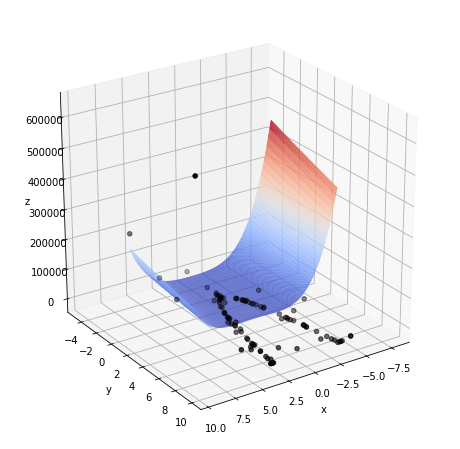

In [144]:
from matplotlib import pyplot as plt
from matplotlib import patheffects
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

X = np.linspace(-8, 6, 200)
Y = np.linspace(-4, 4, 200)

X, Y = np.meshgrid(X, Y)
Z = RosenAlg(X, Y)

fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection='3d')
surface = ax.plot_surface(X, Y, Z,
                          cmap=cm.coolwarm,
                          rstride = 2,
                          cstride = 2)

ax.scatter(xx, yy, zz, c='black')
ax.view_init(25, 56)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');

In [ ]:
n_pygmo = pop_multy.get_x().shape[0]
# print(pop_multy)
# print(n_pygmo)

In [54]:
# pop_multy = algo.evolve(pop_multy)
# n_pygmo = pop.get_x().shape[0]
# pop_multy